In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import os
from tqdm.notebook import tqdm
import time
from icecream import ic
from sklearn.metrics import accuracy_score

import wandb


plt.style.use('seaborn')
np.__version__

/tmp/ipykernel_11716/4105018150.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


'1.24.4'

## Task 1.1

In [2]:
df = pd.read_csv('./Data/WineQT.csv').drop(columns=['Id'], axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

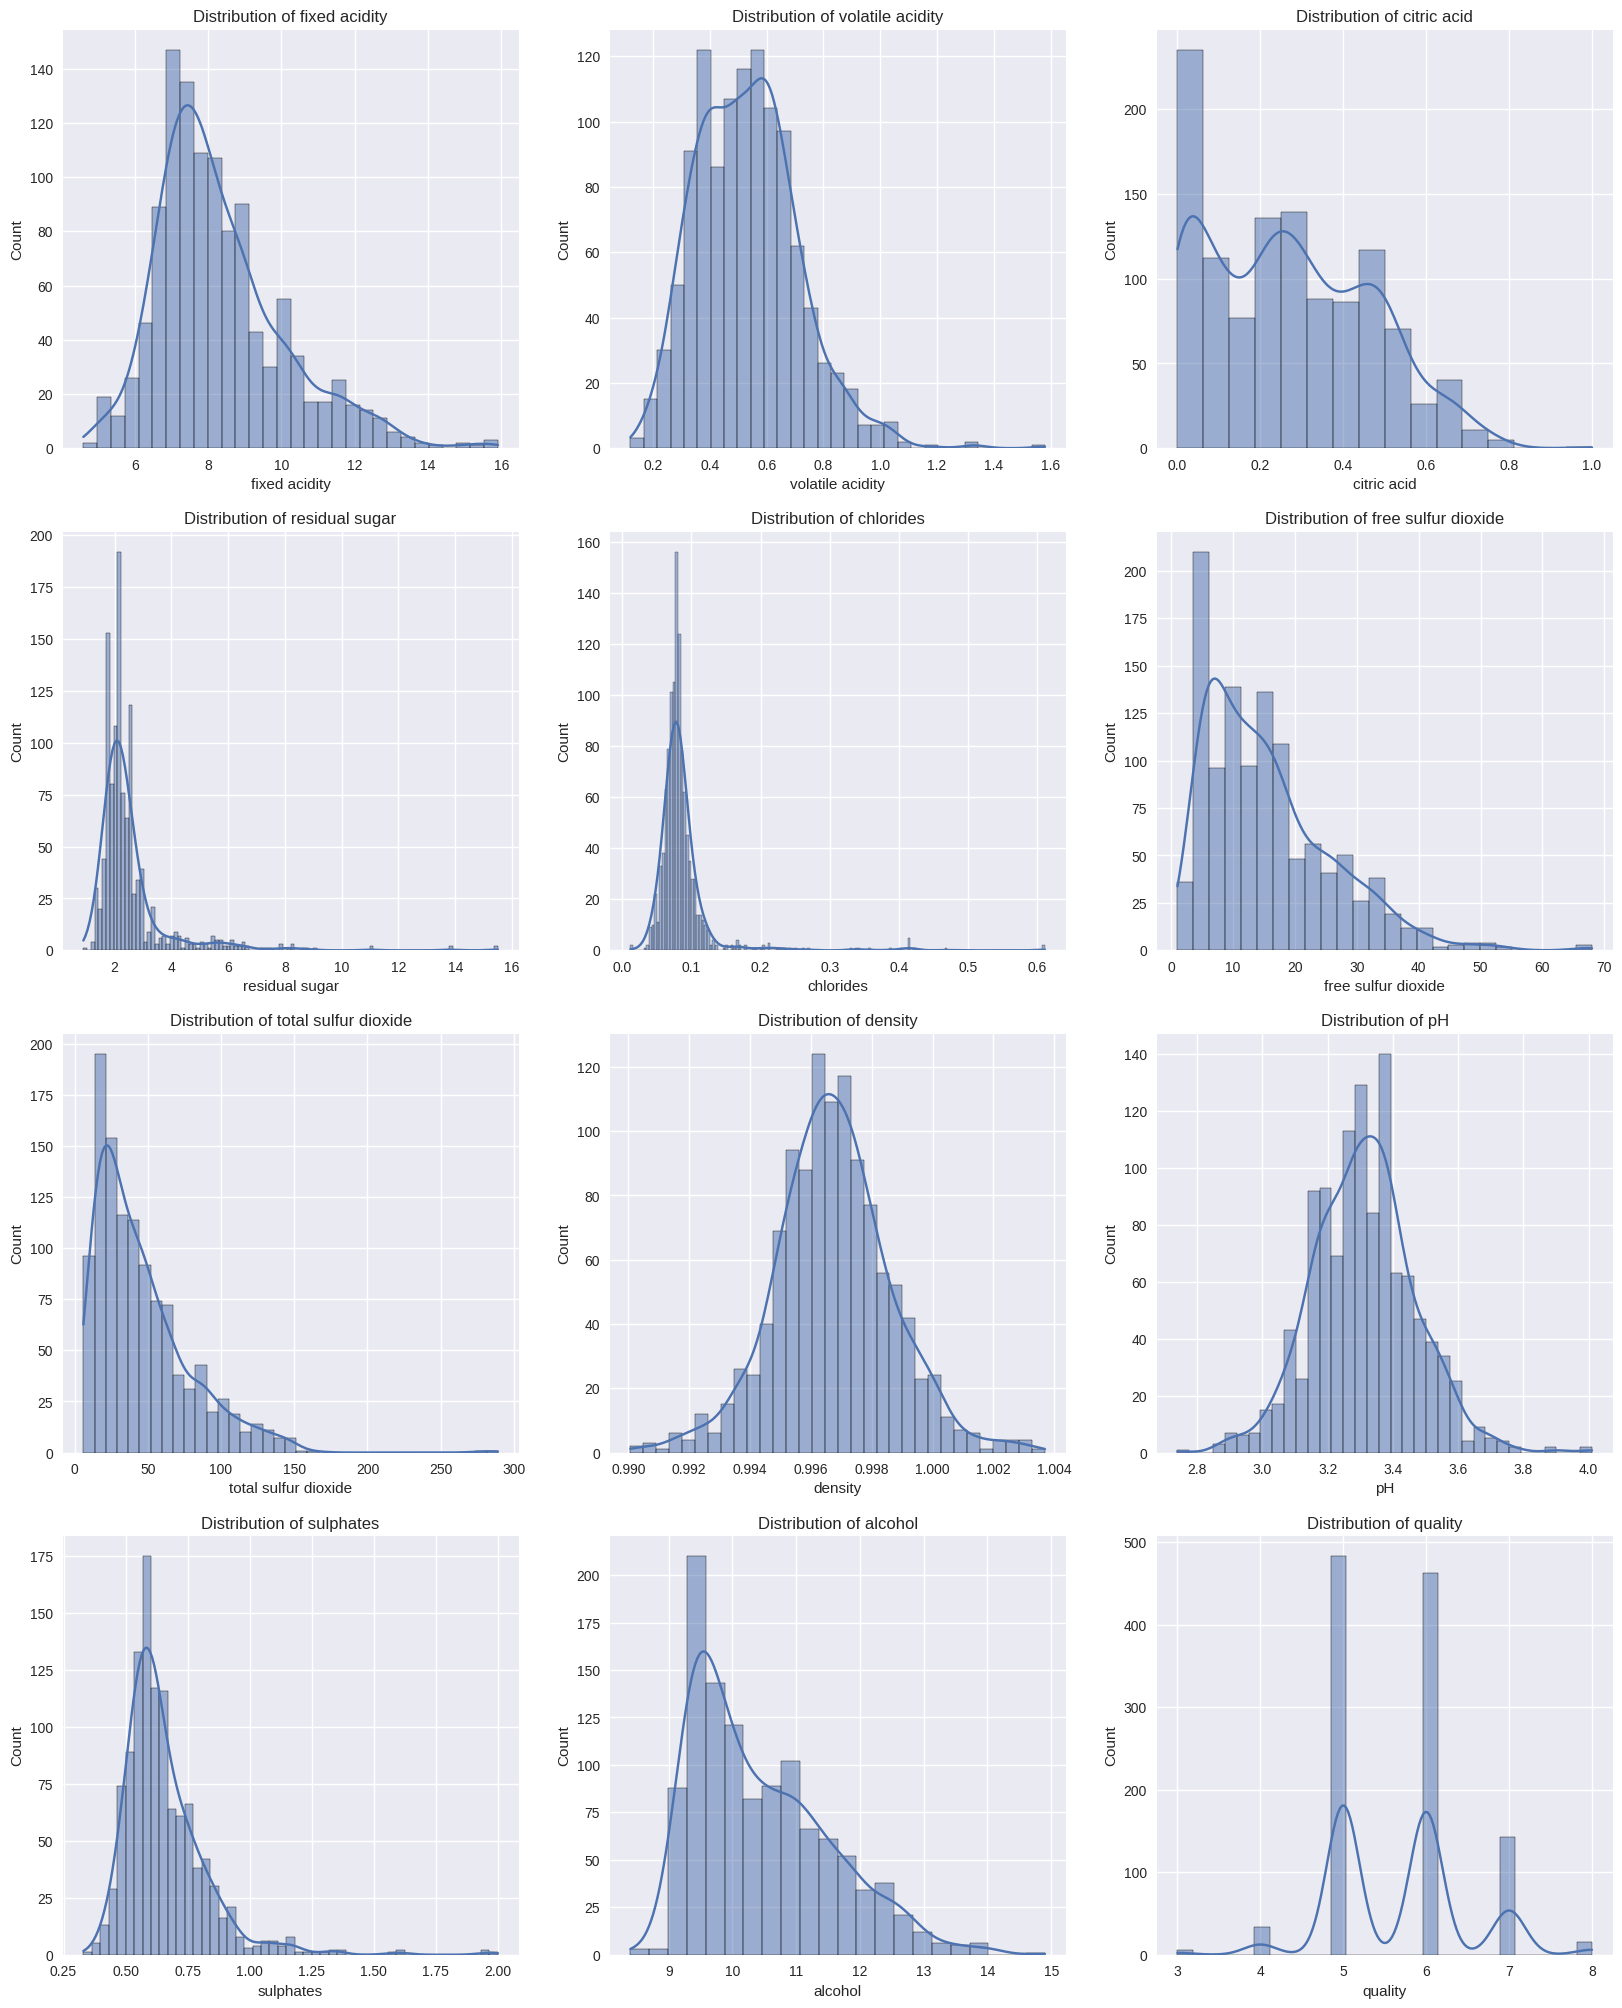

In [5]:
plt.figure(figsize=(20, 25))

for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.title(f'Distribution of {col}')
    sea.histplot(x = col, data = df, kde=True)

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['quality'] = df['quality'].map(lambda x : x - 3)

df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,2
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,2
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,2
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,3
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741,3
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937,3
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515,2
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632,3


In [7]:
from sklearn.decomposition import PCA

def transform_X(X):
    X_temp = np.ones((X.shape[0], X.shape[1] + 1))
    X_temp[:, 1:] = X
    return X_temp

pca = PCA(n_components=2)

# X = pca.fit_transform(df.drop(columns=['quality'], axis=0))
# X = transform_X(X)
X = df.drop(columns=['quality'], axis=0).values
y = pd.get_dummies(df['quality'], dtype=np.float32).values

X.shape, y.shape

((1143, 11), (1143, 6))

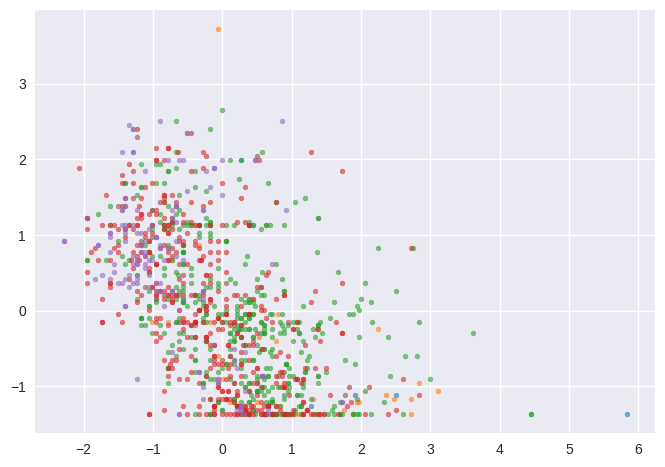

In [8]:
colors = plt.cm.tab10.colors

for c in range(6):
    indices = np.argmax(y, axis=-1) == c
    plt.scatter(X[indices][:, 1], X[indices][:, 2], marker = '.', color=colors[c], alpha=0.6)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 11), (800, 6), (172, 11), (172, 6))

## Task 1.2

In [14]:

from sklearn.metrics import classification_report


params = {
    'lr': 1e-1,
    'epochs': 8000
}

wandb.init(
    project="SMAI-A3-MLR",
    config=params,
    name = f"lr={params['lr']}"
    
)

class MultiLogisticRegression:
    def __init__(self, n_classes, lr = 1e-3):
        self.n_classes = n_classes
        self.lr = lr
        self.accuracy_score = accuracy_score
        self.history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': []
        }
        
        with open('./multinomial_training_output.txt', 'w') as f:
            f.write('')
        
    def initialize_parameters(self, d):
        '''
            W: (c, d)
        '''
        self.W = np.random.uniform(0, 1, (self.n_classes, d))
        self.dW = np.zeros_like(self.W)
        
    def forward(self, x):
        '''
            Input: X = (n, d + 1)
            Output: (n, c)
            Desc: For each class find XW
        '''
        # return np.array([x @ self.W[i] for i in range(self.W.shape[0])]).reshape(-1, 6)
        return x @ self.W.T

    def softmax(self, logits):
        logits = np.exp(logits)
        return logits/np.sum(logits, axis=-1, keepdims=True)
    
    def loss_fxn(self, y_pred, y):
        '''
            Input:  y_pred = (n, c) -> one hot vector for each data point
                    y = (n, c) ->
            Output: (n, )
            Desc:   
        '''
        loss = np.mean(np.max(-y * np.log(y_pred), axis=-1))
        return loss
    
    def calculate_gradients(self, y_pred, y, x):
        
        for i in range(self.dW.shape[0]):
            for j in range(self.dW.shape[1]):
                self.dW[i, j] = np.mean((y_pred[:, i] - y[:, i]) * x[:, j])
    
    def update_gradients(self):
        self.W = self.W - self.lr * self.dW
    
    def accuracy(self, y_pred, y):
        return self.accuracy_score(np.argmax(y, axis=-1), np.argmax(y_pred, axis=-1))
    
    def validation_step(self, x, y, epoch):
        y_pred = self.softmax(self.forward(x))
        loss = self.loss_fxn(y_pred, y)
        acc = self.accuracy(y_pred, y)
        
        if epoch % 100 == 0:
            report = classification_report(np.argmax(y, -1), np.argmax(y_pred, -1), zero_division=0)
            with open('./multinomial_training_output.txt', 'a') as f:
                f.write(report)
                f.write(("=" * 50) + "\n")
        return loss, acc
    
    def trainining_step(self, X, y, epoch):
        y_pred = self.softmax(self.forward(X))
        loss = self.loss_fxn(y_pred, y)
        
        self.calculate_gradients(y_pred, y, X)
        self.update_gradients()
        
        acc = self.accuracy(y_pred, y)
        return loss, acc 
    
    def do_one_epoch(self, X, y, step_fxn, epoch):
        loss, acc = step_fxn(X, y, epoch)
        return loss, acc
    
    def update_history(self, params):
        for v, p in zip(self.history.values(), params):
            v.append(p)
            
    def predict(self, X):
        return self.softmax(self.forward(X))
    
    def fit(self, X, y, val_data, epochs=100):

        self.n, self.d = X.shape
        self.initialize_parameters(self.d)

        for epoch in range(epochs):
            
            train_loss, train_acc = self.do_one_epoch(X, y, step_fxn=self.trainining_step, epoch=epoch)
            val_loss, val_acc = self.do_one_epoch(*val_data, step_fxn=self.validation_step, epoch=epoch)
            
            self.update_history([train_loss, train_acc, val_loss, val_acc])
            
            if (epoch + 1) % 3 == 0:
                print(f'{time.strftime("%H:%M:%S")}: [Epoch:{epoch + 1}] Train:[loss:{train_loss:.3f}, acc:{train_acc:.3f}] Val: [loss:{val_loss:.3f}, acc:{val_acc:.3f}]')
                wandb.log({"train_acc": train_acc, "train_loss": train_loss, 'val_acc': val_acc, 'val_loss': val_loss})
                
        wandb.finish()


In [15]:
model = MultiLogisticRegression(n_classes=6, lr=params['lr'])
    
model.fit(X_train, y_train, (X_val, y_val), epochs=params['epochs'])

12:04:22: [Epoch:3] Train:[loss:2.069, acc:0.210] Val: [loss:2.155, acc:0.193]
12:04:22: [Epoch:6] Train:[loss:1.987, acc:0.240] Val: [loss:2.071, acc:0.205]
12:04:22: [Epoch:9] Train:[loss:1.917, acc:0.264] Val: [loss:2.000, acc:0.211]
12:04:22: [Epoch:12] Train:[loss:1.858, acc:0.274] Val: [loss:1.940, acc:0.240]
12:04:22: [Epoch:15] Train:[loss:1.809, acc:0.290] Val: [loss:1.890, acc:0.269]
12:04:22: [Epoch:18] Train:[loss:1.766, acc:0.304] Val: [loss:1.848, acc:0.275]
12:04:22: [Epoch:21] Train:[loss:1.730, acc:0.326] Val: [loss:1.812, acc:0.292]
12:04:22: [Epoch:24] Train:[loss:1.700, acc:0.340] Val: [loss:1.782, acc:0.292]
12:04:22: [Epoch:27] Train:[loss:1.673, acc:0.351] Val: [loss:1.756, acc:0.310]
12:04:22: [Epoch:30] Train:[loss:1.650, acc:0.369] Val: [loss:1.733, acc:0.316]
12:04:22: [Epoch:33] Train:[loss:1.631, acc:0.395] Val: [loss:1.713, acc:0.351]
12:04:22: [Epoch:36] Train:[loss:1.613, acc:0.411] Val: [loss:1.696, acc:0.368]
12:04:22: [Epoch:39] Train:[loss:1.598, acc

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


train_acc,▁▅▆██████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇▇█▇▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
val_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.5725
train_loss,1.39298
val_acc,0.49708
val_loss,1.44493


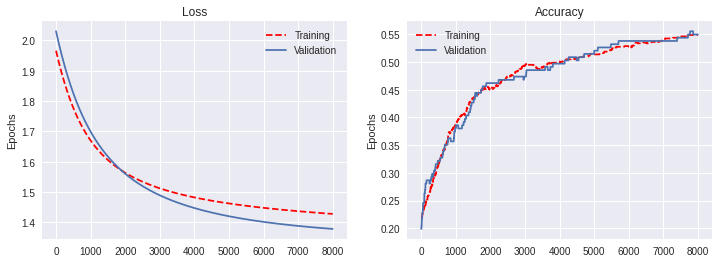

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(model.history['train_loss'], '--r', label='Training')
plt.plot(model.history['val_loss'], label='Validation')
plt.ylabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(model.history['train_acc'], '--r', label ='Training')
plt.plot(model.history['val_acc'], label='Validation')
plt.ylabel('Epochs')
plt.legend()



In [17]:

pred_test = model.predict(X_test)

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_test, axis=-1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.08      0.17      0.11         6
           2       0.64      0.71      0.67        76
           3       0.56      0.31      0.40        64
           4       0.38      0.57      0.46        23
           5       0.00      0.00      0.00         2

    accuracy                           0.51       172
   macro avg       0.28      0.29      0.27       172
weighted avg       0.54      0.51      0.51       172



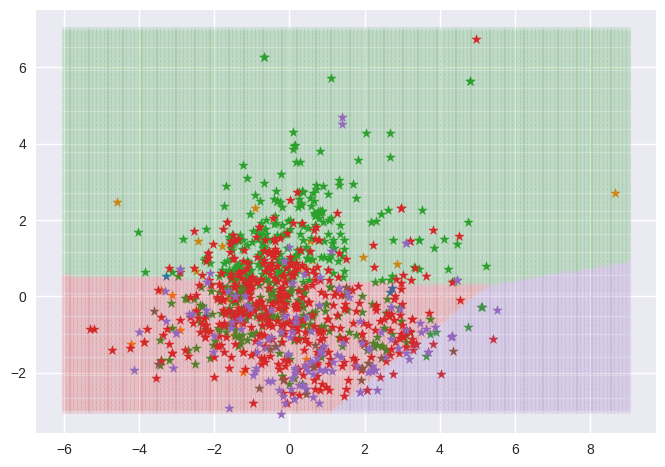

In [100]:
xx, yy = np.meshgrid(
    np.linspace(-6, 9, 150),
    np.linspace(-3, 7, 150)
)

coords = np.ones((xx.shape[0] ** 2, 3))
coords[:, 1:] = np.c_[xx.ravel(), yy.ravel()]

y_pred = np.argmax(model.predict(coords), axis=-1)

# coords = coords[:, 1:]
colors = plt.cm.tab10.colors

for c in range(6):
    indices1 = y_pred == c
    indices2 = np.argmax(y, axis=-1) == c
    plt.scatter(coords[indices1][:, 1], coords[indices1][:, 2], marker = '.', color=colors[c], alpha=0.1)
    plt.scatter(X[indices2][:, 1], X[indices2][:, 2], marker = '*', color=colors[c], alpha=1)
    
plt.show()

    

## 2.1

In [16]:
class DataLoader:
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.i = 0
        
    def __iter__(self):
        return self
    
    def __len__(self):
        return int(len(self.X)/self.batch_size)
    
    def __next__(self):
        
        start, end = self.batch_size * self.i, self.batch_size * (self.i + 1)
        if end > len(self.X):
            self.i = 0
            raise StopIteration

        self.i = (self.i + 1)                  
        return self.X[start: end, ], self.y[start : end, ]
            
            

train_loader = DataLoader(X, y, batch_size=800)
len(train_loader)

1

In [17]:
class Relu:
    def __call__(self, x):
        return np.maximum(np.zeros_like(x), x)    
    def __str__(self):
        return "ReLU"
    def grad(self, x):
        return (x >= 0).astype(np.float32)

class Sigmoid:
    def __call__(self, x):
        return 1/(1 + np.exp(-x))
    def __str__(self):
        return "Sigmoid"
    def grad(self, x):
        return self.__call__(x) * (1 - self.__call__(x))
    
class Linear:
    def __call__(self, x):
        return x
    def __str__(self):
        return "Linear"
    def grad(self, x):
        return np.ones_like(x)

class Tanh:
    def __call__(self, x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    def __str__(self):
        return "Tanh"
    def grad(self, x):
        return 1 - (self.__call__(x) ** 2)
    
class Softmax:
    def __call__(self, x):
        return (np.exp(x)/np.sum(np.exp(x), axis=-1, keepdims=True)) 
    def __str__(self):
        return "Softmax"
    def grad(self, x):
        return np.ones_like(x)
    
    
class MSELoss:
    def __call__(self, y, y_pred):
        self.y, self.y_pred = y, y_pred
        return np.mean((self.y - self.y_pred) ** 2)
    def grad(self):
        return -2 * (self.y - self.y_pred)
    
class BCELoss:
    def __call__(self, y, y_pred):
        self.y, self.y_pred = y, y_pred
    def grad(self):
        pass
    
class CrossEntropyLoss:
    def __call__(self, y, y_pred):
        self.y, self.y_pred = y, y_pred
        return np.mean(np.sum(-y  * np.log(y_pred), axis=-1))
    def grad(self):
        return self.y_pred - self.y


In [18]:
class Neuron:
    def __init__(self, dim_in, activation):
        self.dzw, self.dzx, self.daz = 0, 0, 0
        self.dim_in = dim_in
        self.activation = activation
    
    def get_grads(self):
        return [self.dzw, self.dzx, self.daz]
        
    def calculate_grad(self, x, z, w, index):
        self.dzw = x
        self.dzx = w[index]
        self.daz = self.activation.grad(z[:, index])
        # print(self.daz.shape, self.dzw.shape, self.daz.shape)
        
        return [self.dzw, self.dzx, self.daz]
    
class Layer:
    def __init__(self, dim_in, dim_out, activation):
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.activation = activation
        
        self.W = np.random.randn(self.dim_out, self.dim_in)
        self.b = np.random.randn(self.dim_out)
        
        self.neurons = [Neuron(self.dim_in, activation) for _ in range(self.dim_out)]
        
        self.dzw, self.dzx, self.daz = [], [], []
        
    
    def get_grads(self):
        grads = [np.stack(self.dzw, axis=1),
                np.stack(self.dzx, axis=-1), 
                np.stack(self.daz, axis=-1)]

        self.dzw.clear()
        self.dzx.clear()
        self.daz.clear()
        return grads
        
    def __str__(self):
        return(f"Layer: [in:{self.dim_in}] [out:{self.dim_out}] [activation:{self.activation}]")
        
    def __call__(self, x):
        '''
            x: (bs, dim_in)
        '''
        
        if x.shape[1] != self.dim_in:
            raise TypeError(f'Input should have dimension {self.dim_in} but found {x.shape[1]}')
        
        z = x @ self.W.T + self.b
        self.a = self.activation(z)

        self.daz.clear()
        self.dzx.clear()
        self.dzw.clear()

        for i, neuron in enumerate(self.neurons):
            dzw, dzx, daz = neuron.calculate_grad(x, z, self.W, i)
            self.dzw.append(dzw)
            self.dzx.append(dzx)
            self.daz.append(daz)
            
        return self.a


In [19]:
from sklearn.metrics import accuracy_score, r2_score

class Model:
    def __init__(self, logger, loss_fxn=MSELoss(), lr=1e-3, type='regression'):
        self.loss_fxn = loss_fxn
        self.layers = []
        self.lr = lr
        self.dW, self.dB = [], []
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc':[]
        }
        self.accuracy = self.classification_accuracy if type=='classification' else self.regression_accuracy
        self.logger = logger
        
    def classification_accuracy(self, y_pred, y):
        return accuracy_score(np.argmax(y, axis=-1), np.argmax(y_pred, axis=-1))
        
    def regression_accuracy(self, y_pred, y):
        return r2_score(y, y_pred)
        
    def __str__(self):
        out = ""
        for layer in self.layers:
            out += layer.__str__() + "\n"
        return out

    def add(self, layer):
        self.layers.append(layer)

    def __call__(self, x):
        '''
            x: (bs, dim_in)
        '''
        for layer in self.layers:
            x = layer(x)
        return x

    def backward(self):
        dLy = self.loss_fxn.grad()
        common = dLy

        for i in range(len(self.layers)-1, -1, -1):
            dzw, dzx, daz = self.layers[i].get_grads()
            if i != len(self.layers) - 1:
                common = common @ self.layers[i + 1].W
            common = common * daz
            dw = common[:, :, None] * dzw
            db = common[:, :] * 1
            
            self.dW.append(np.mean(dw, axis=0))
            self.dB.append(np.mean(db, axis=0))
            
    def update_gradients(self):
        for i, (dw, db) in enumerate(zip(reversed(self.dW), reversed(self.dB))):
            self.layers[i].W += - self.lr * dw
            self.layers[i].b += - self.lr * db
            
        self.dW.clear()
        self.dB.clear()
        
    def training_step(self, loader):
        loss, acc = 0, 0
        for x, y in loader:
            y_pred = self.__call__(x)
            loss += self.loss_fxn(y, y_pred)
            acc += self.accuracy(y_pred, y)
            
            self.backward()
            self.update_gradients()
            
        return loss/len(loader), acc/len(loader)
    
    def validate_step(self, loader):
        loss, acc = 0, 0
        for x, y in loader:
            y_pred = self.__call__(x)
            loss += self.loss_fxn(y, y_pred)
            acc += self.accuracy(y_pred, y)
            
        return loss/len(loader), acc/len(loader)

    def train(self, train_loader, val_loader, epochs):

        for epoch in range(epochs):
            
            train_loss, train_acc = self.training_step(train_loader)
            val_loss, val_acc = self.validate_step(val_loader)
            
            
            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_acc)
            
            if epoch % 20 == 0:
                print(f"epoch: {epoch} \tTrain:[loss:{train_loss:.4f} acc:{train_acc:.4f}] \tVal:[loss: {val_loss:.4f} acc:{val_acc:.4f}]")
    
            if self.logger is not None:
                self.logger.log({"train_acc": train_acc, "train_loss": train_loss, 'val_acc': val_acc, 'val_loss': val_loss})
        

In [14]:

params = {
    'lr' : 1e-3,
    'batch_size':800,
    'epoch': 1000,
    'activation': 'tanh'
}

activations = {
    'relu': Relu(),
    'sigmoid': Sigmoid(),
    'tanh': Tanh()
}

batch_training = 'batched' if params['batch_size'] == 800 else ('SGD' if params['batch_size'] == 1 else 'mini-batch')

wandb.init(
    project="SMAI-A3-NN",
    config=params,
    name=f"{params['activation']}|{batch_training}"
    
)

model = Model(lr=params['lr'], logger=wandb, loss_fxn=CrossEntropyLoss(), type='classification')

model.add(Layer(11, 16, activations[params['activation']]))
model.add(Layer(16, 16, activations[params['activation']]))
model.add(Layer(16, 6, Softmax()))

print(model)

train_loader = DataLoader(X_train, y_train, batch_size=params['batch_size'])
val_loader = DataLoader(X_val, y_val, batch_size=32)



Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: fk280. Use `wandb login --relogin` to force relogin


Layer: [in:11] [out:16] [activation:Tanh]
Layer: [in:16] [out:16] [activation:Tanh]
Layer: [in:16] [out:6] [activation:Softmax]



In [15]:
model.train(train_loader, val_loader, epochs=params['epoch'])



epoch: 0 	Train:[loss:6.2816 acc:0.1487] 	Val:[loss: 6.1972 acc:0.1562]
epoch: 20 	Train:[loss:6.2129 acc:0.1537] 	Val:[loss: 6.1389 acc:0.1562]
epoch: 40 	Train:[loss:6.1451 acc:0.1588] 	Val:[loss: 6.0817 acc:0.1562]
epoch: 60 	Train:[loss:6.0784 acc:0.1638] 	Val:[loss: 6.0257 acc:0.1625]
epoch: 80 	Train:[loss:6.0127 acc:0.1675] 	Val:[loss: 5.9709 acc:0.1688]
epoch: 100 	Train:[loss:5.9481 acc:0.1688] 	Val:[loss: 5.9171 acc:0.1688]
epoch: 120 	Train:[loss:5.8845 acc:0.1713] 	Val:[loss: 5.8645 acc:0.1750]
epoch: 140 	Train:[loss:5.8221 acc:0.1762] 	Val:[loss: 5.8128 acc:0.1750]
epoch: 160 	Train:[loss:5.7608 acc:0.1787] 	Val:[loss: 5.7623 acc:0.1875]
epoch: 180 	Train:[loss:5.7006 acc:0.1812] 	Val:[loss: 5.7127 acc:0.1875]
epoch: 200 	Train:[loss:5.6416 acc:0.1850] 	Val:[loss: 5.6640 acc:0.1938]
epoch: 220 	Train:[loss:5.5837 acc:0.1888] 	Val:[loss: 5.6163 acc:0.2000]
epoch: 240 	Train:[loss:5.5269 acc:0.1913] 	Val:[loss: 5.5694 acc:0.1938]
epoch: 260 	Train:[loss:5.4713 acc:0.1963] 	

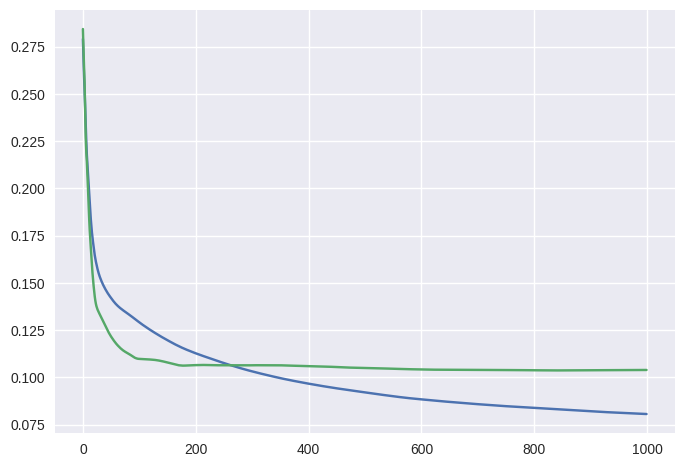

In [67]:
plt.plot(model.history['train_loss'])
plt.plot(model.history['val_loss'])

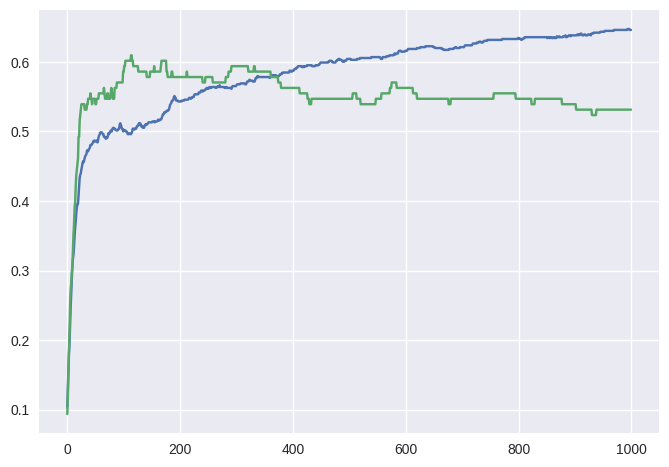

In [68]:
plt.plot(model.history['train_acc'])
plt.plot(model.history['val_acc'])

In [69]:
y_pred = model(X_test)

print(classification_report(np.argmax(y_test, -1), np.argmax(y_pred, -1), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.64      0.64      0.64        76
           3       0.49      0.59      0.54        64
           4       0.50      0.30      0.38        23
           5       0.00      0.00      0.00         2

    accuracy                           0.55       172
   macro avg       0.27      0.26      0.26       172
weighted avg       0.53      0.55      0.53       172



### Comparison with logistic regression model

## 3. Multilayer Perceptrion Regression

In [20]:
df = pd.read_csv('./Data/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [23]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
# plt.figure(figsize=(18, 22))

# for i, col in enumerate(df.columns):
#     plt.subplot(4, 4, i + 1)
#     plt.title(f'Distribution of {col}')
#     sea.histplot(x = col, data = df, kde=True)

# plt.show()

In [24]:
nan_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
for col in nan_cols:
    df[col] = df[col].fillna(df[col].mean(), inplace=False)
    

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,-0.121059,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146,0.159686
1,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,0.378716,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.510353,-0.101524
2,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,-0.270627,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.239748,1.324247
3,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,-0.828770,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.395333,1.182758
4,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,-0.522338,1.077737,-0.752922,-1.106115,0.113032,0.441052,0.000000,1.487503


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:, :-1].values, df_scaled.iloc[:, -1].values, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_val.shape


((404, 13), (404,), (51, 13), (51,), (51, 13), (51,))

In [32]:

params = {
    'lr' : 1e-3,
    'batch_size':800,
    'epoch': 1000,
    'activation': 'tanh'
}

activations = {
    'relu': Relu(),
    'sigmoid': Sigmoid(),
    'tanh': Tanh()
}

batch_training = 'batched' if params['batch_size'] == 800 else ('SGD' if params['batch_size'] == 1 else 'mini-batch')

wandb.init(
    project="SMAI-A3-NN-regression",
    config=params,
    name=f"{params['activation']}|{batch_training}"
)


model = Model(lr=params['lr'], loss_fxn=MSELoss(), logger=wandb, type='regression')
model.add(Layer(13, 6, activations[params['activation']]))
model.add(Layer(6, 6, activations[params['activation']]))
model.add(Layer(6, 1, Linear()))

print(model)

train_loader = DataLoader(X_train, y_train.reshape(-1,1), batch_size=32)
val_loader = DataLoader(X_val, y_val.reshape(-1,1), batch_size=32)

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


train_acc,▁▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████
train_loss,█▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████
val_loss,███▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
train_acc,0.44148
train_loss,0.48708
val_acc,0.33451
val_loss,0.86295


Layer: [in:13] [out:6] [activation:Tanh]
Layer: [in:6] [out:6] [activation:Tanh]
Layer: [in:6] [out:1] [activation:Linear]



In [33]:
model.train(train_loader, val_loader, epochs=1000)


epoch: 0 	Train:[loss:4.8608 acc:-5.8619] 	Val:[loss: 3.3548 acc:-1.5872]
epoch: 20 	Train:[loss:1.2198 acc:-0.6630] 	Val:[loss: 1.0366 acc:0.2006]
epoch: 40 	Train:[loss:0.8039 acc:-0.0358] 	Val:[loss: 0.8887 acc:0.3146]
epoch: 60 	Train:[loss:0.7033 acc:0.1187] 	Val:[loss: 0.8497 acc:0.3448]
epoch: 80 	Train:[loss:0.6501 acc:0.1940] 	Val:[loss: 0.8095 acc:0.3758]
epoch: 100 	Train:[loss:0.6067 acc:0.2502] 	Val:[loss: 0.7649 acc:0.4102]
epoch: 120 	Train:[loss:0.5666 acc:0.2993] 	Val:[loss: 0.7190 acc:0.4455]
epoch: 140 	Train:[loss:0.5291 acc:0.3441] 	Val:[loss: 0.6749 acc:0.4795]
epoch: 160 	Train:[loss:0.4948 acc:0.3844] 	Val:[loss: 0.6350 acc:0.5103]
epoch: 180 	Train:[loss:0.4644 acc:0.4199] 	Val:[loss: 0.6005 acc:0.5369]
epoch: 200 	Train:[loss:0.4381 acc:0.4505] 	Val:[loss: 0.5717 acc:0.5591]
epoch: 220 	Train:[loss:0.4157 acc:0.4766] 	Val:[loss: 0.5478 acc:0.5775]
epoch: 240 	Train:[loss:0.3967 acc:0.4988] 	Val:[loss: 0.5281 acc:0.5927]
epoch: 260 	Train:[loss:0.3804 acc:0.517

In [163]:

r2_score(y_train.ravel(), model(X_train)) 

0.6066161814398112

wandb: Network error (ConnectionError), entering retry loop.
